#Load a pre-trained model

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

553467096/553467096 [==============================] - 25s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

# Visualize Filters

In [2]:
for layer in model.layers: # access all the layers
  print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [3]:
for layer in model.layers:
  if 'conv' in layer.name:
    filters, biases =layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


(3, 3, 3, 64) ->
(height, width, channels, number_of_filters)

In [4]:
filters, biases= model.layers[1].get_weights() # weights from the 2nd hidden layer
filters.shape 

(3, 3, 3, 64)

In [5]:
filters[:, :, :, 0].shape #1st filter

(3, 3, 3)

 * Normalize values between 0 and 1

 x$_{i_{normalized}}$ = (x$_i$ – x$_{min}$) / (x$_{max}$ – x$_{min}$)

In [6]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

 Plot filters 

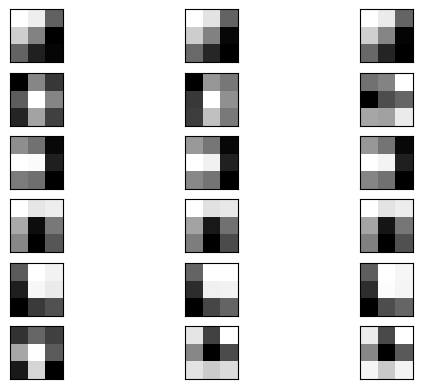

In [11]:
import matplotlib.pyplot as plt

n_filters, ix = 6, 1
for i in range(n_filters):
	f = filters[:, :, :, i]
	for j in range(3): #3 channels
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
plt.show()

Dark squares indicate small weights and the light squares represent large weights